# Cube de données G353 TP+7m+12m N2H+ continuum subtracted 

In [1]:
%pylab inline
from pywavan import fbm2d, powspec, fan_trans
from astropy.io import fits
import aplpy
from pywavan import subfits
from pywavan import nb_scale

Populating the interactive namespace from numpy and matplotlib


In [2]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353.41_n2hp_feathered_contsub.fits")
cube = HDU[0].data
header = HDU[0].header

In [3]:
cube.shape

(1, 217, 960, 960)

In [4]:
del header['CTYPE4']
del header['CRVAL4']
del header['CDELT4']
del header['CRPIX4']
del header['CUNIT4']
del header['NAXIS4']
del header['PC4_1']
del header['PC4_2']
del header['PC4_3']
del header['PC1_4']
del header['PC2_4']
del header['PC3_4']
del header['PC4_4']
header['NAXIS'] = 3

In [5]:
new_cube = []
for i in range(header['NAXIS3']) :
    new_cube.append(cube[0,i,:,:])

In [6]:
new_cube = np.array(new_cube)

In [7]:
new_cube.shape

(217, 960, 960)

In [8]:
fits.writeto("/user/workdir/soldanof/ALMA/G353.41_n2hp_feathered_contsub2.fits",new_cube, header) 

In [9]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353.41_n2hp_feathered_contsub2.fits")
cube = HDU[0].data
header = HDU[0].header

In [10]:
cube.shape

(217, 960, 960)

INFO: Auto-setting vmin to -5.135e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.263e-01 [aplpy.core]


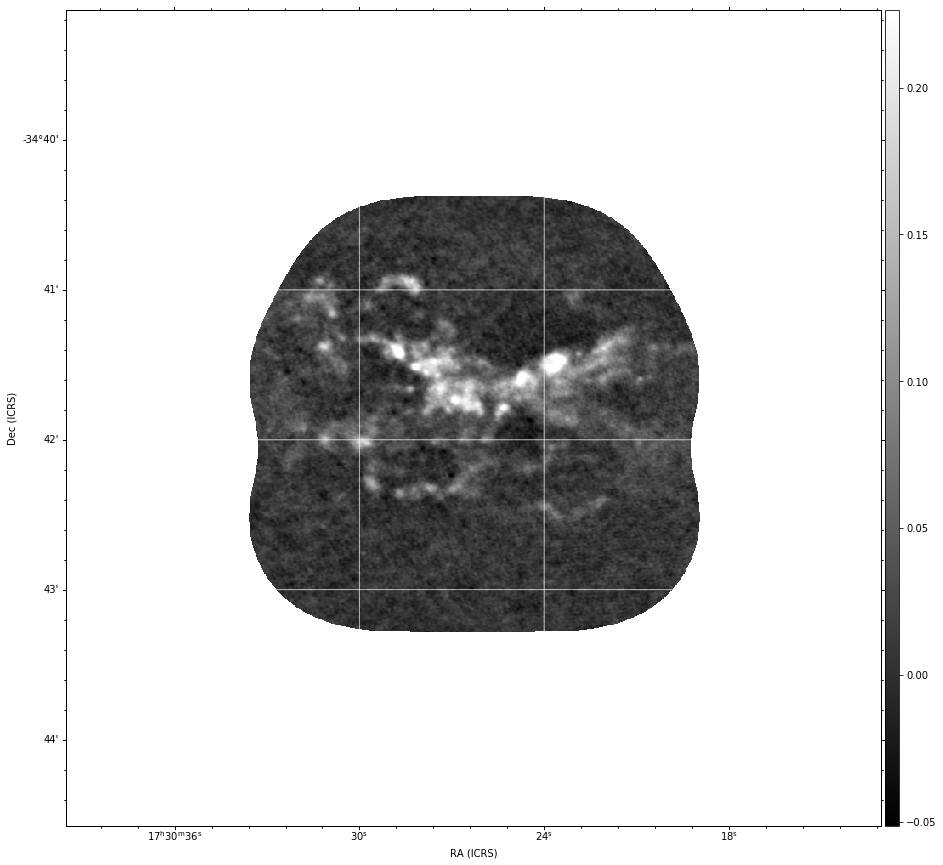

In [13]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353.41_n2hp_feathered_contsub2.fits",figure=fig_all,slices=[80])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Cut du cube d'origine

In [14]:
input1 = '/user/workdir/soldanof/ALMA/G353.41_n2hp_feathered_contsub2.fits'
output = '/user/workdir/soldanof/ALMA/G353.41_n2hp_feathered_contsub_cut.fits'
coord = np.array([267,299,58,686,640,167])
subfits(input1,output,coord)

Dimensions 420 342 110


In [15]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353.41_n2hp_feathered_contsub_cut.fits")
cube = HDU[0].data
header = HDU[0].header

INFO: Auto-setting vmin to -5.582e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.746e-01 [aplpy.core]


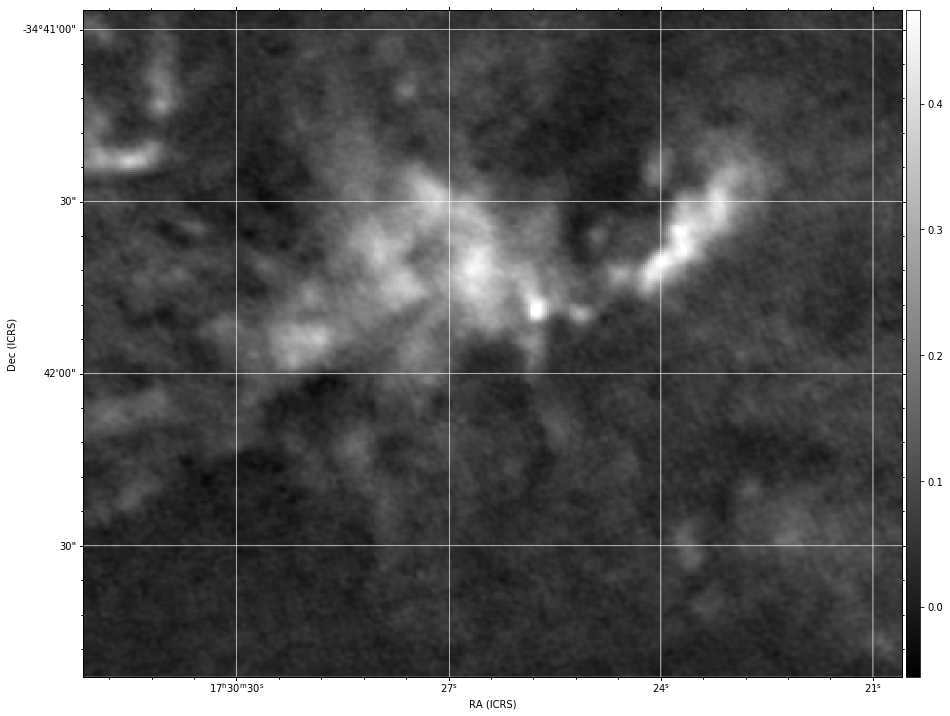

In [16]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353.41_n2hp_feathered_contsub_cut.fits",figure=fig_all,slices=[50])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Test de vérification de pywavan 

In [17]:
cube.shape

(110, 342, 420)

In [19]:
reso = header ['CDELT2']*60
q = []
q= [2.0]*nb_scale((110, 500,600))

wt, S11a, wave_k, S1a, q =  fan_trans(cube[50,:,:], reso=reso, angular=False,q=q,apodize = 0.98,arrdim = np.array([500,600]))

  0%|          | 0/22 [00:00<?, ?it/s]

600 500


100%|██████████| 22/22 [00:17<00:00,  1.28it/s]


In [20]:
M = nb_scale((115, 500,600))

coherent = np.sum(wt[M:2*M,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 

Text(0.5, 1.0, 'coherent')

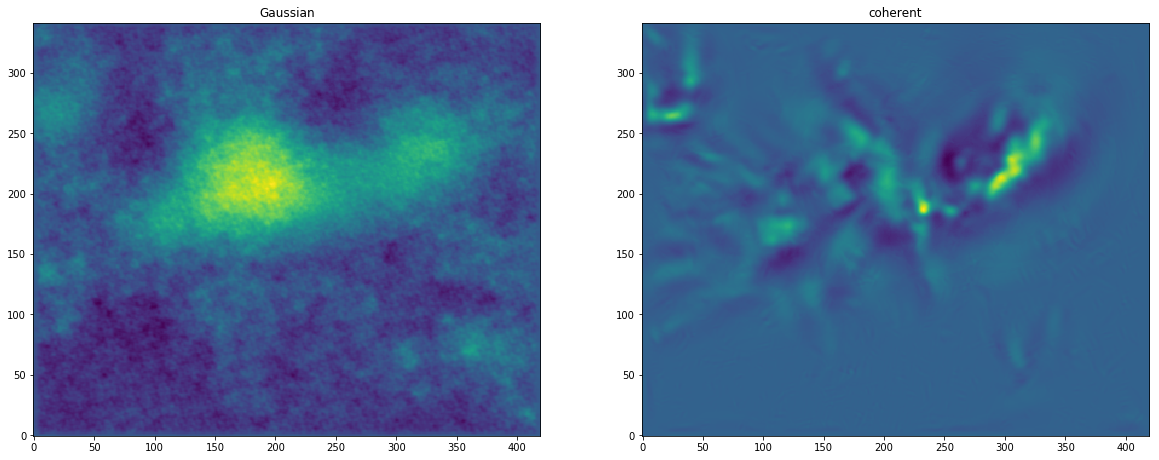

In [21]:
figure(figsize=(20,10))
subplot(1,2,1)
imshow(Gaussian.real,origin="lower")
title('Gaussian')
subplot(1,2,2)
imshow(coherent.real,origin="lower")
title('coherent') 

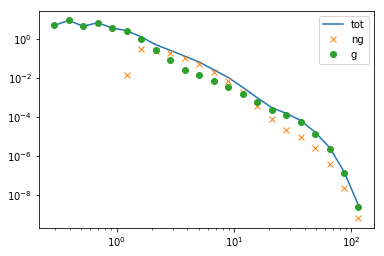

In [22]:
plt.plot(wave_k, S1a[0,:],label="tot")
plt.plot(wave_k, S1a[1,:],"x",label="ng")
plt.plot(wave_k, S1a[2,:],"o",label="g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

***
# Pywavan sur tout le cube

In [26]:
reso = header ['CDELT2']*60
M = nb_scale((110, 500,600))
N = header['NAXIS3']

In [27]:
coherent_tot = []
gaussian_tot = []
s1a_tot_tot = []
s1a_tot_gau = []
s1a_tot_ng = []

for i in range(N) :
    q = []
    q= [2.0]*nb_scale((115, 500,600))
    print("data number",i)
    wt, S11a, wave_k, S1a, q =  fan_trans(cube[i,:,:], reso=reso, angular=False,q=q,apodize = 0.98,arrdim = np.array([500,600]))

    coherent = np.sum(wt[M:2*M,:,:],axis=0)
    Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 
    
    coherent_tot.append( coherent )
    gaussian_tot.append( Gaussian )
    s1a_tot_tot.append( S1a[0,:] )
    s1a_tot_ng.append(S1a[1,:])
    s1a_tot_gau.append(S1a[2,:])

np.save("/user/workdir/soldanof/data/G353f_contsub/coh.npy", coherent_tot)
np.save("/user/workdir/soldanof/data/G353f_contsub/gau.npy", gaussian_tot)
np.save("/user/workdir/soldanof/data/G353f_contsub/s1at.npy",s1a_tot_tot)
np.save("/user/workdir/soldanof/data/G353f_contsub/s1ag.npy",s1a_tot_gau)
np.save("/user/workdir/soldanof/data/G353f_contsub/s1ang.npy",s1a_tot_ng)
np.save("/user/workdir/soldanof/data/G353f_contsub/wave_k.npy",wave_k)

  0%|          | 0/22 [00:00<?, ?it/s]

data number 0
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 1
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 2
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 3
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 4
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 5
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 6
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 7
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 8
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 9
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 10
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 11
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 12
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 13
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 14
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 15
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 16
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 17
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 18
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 19
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 20
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 21
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 22
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 23
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 24
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 25
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 26
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 27
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 28
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 29
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 30
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 31
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 32
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 33
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 34
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 35
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 36
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 37
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 38
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 39
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 40
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 41
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 42
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 43
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 44
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 45
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 46
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 47
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 48
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 49
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 50
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 51
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 52
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 53
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 54
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 55
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 56
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 57
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 58
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 59
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 60
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 61
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 62
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 63
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 64
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 65
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 66
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 67
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 68
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 69
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 70
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 71
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 72
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 73
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 74
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 75
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 76
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 77
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 78
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 79
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 80
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 81
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 82
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 83
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 84
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 85
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 86
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 87
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 88
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 89
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 90
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 91
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 92
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 93
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 94
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 95
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 96
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 97
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 98
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 99
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 100
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 101
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 102
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 103
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 104
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 105
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 106
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 107
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 108
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 109
600 500


100%|██████████| 22/22 [00:14<00:00,  1.50it/s]


Text(0.5, 1.0, 'Coherent')

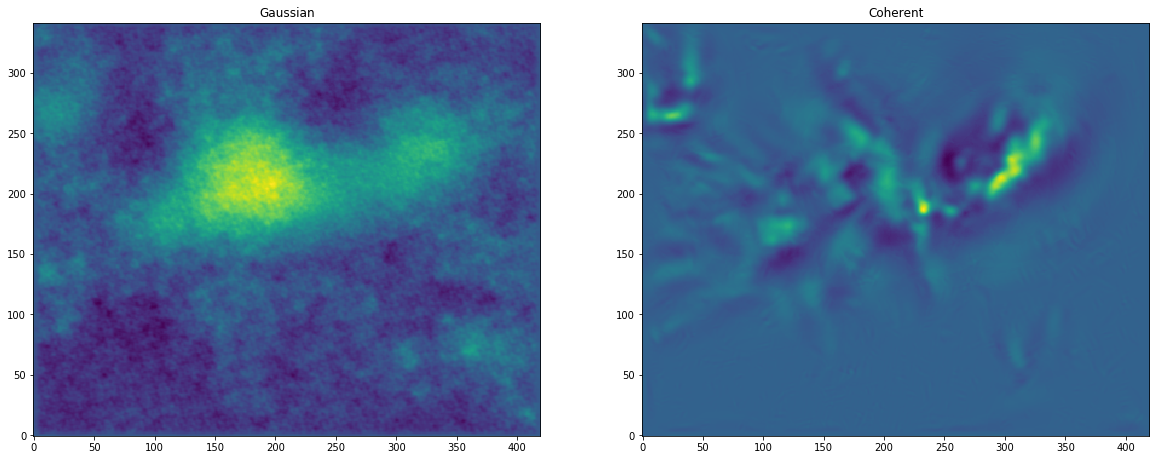

In [28]:
figure(figsize=(20,10))
im_g = np.load("/user/workdir/soldanof/data/G353f_contsub/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/G353f_contsub/coh.npy")

subplot(1,2,1)
imshow(im_g[50].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[50].real,origin="lower")
title('Coherent')

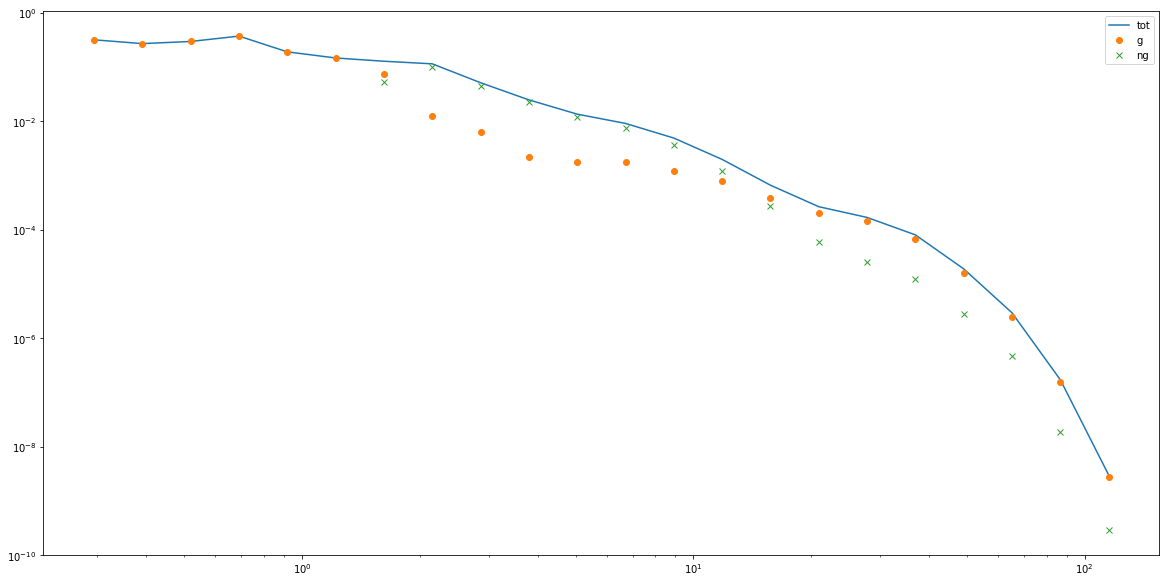

In [29]:
figure(figsize=(20,10))
t = np.load("/user/workdir/soldanof/data/G353f_contsub/s1at.npy")
g = np.load("/user/workdir/soldanof/data/G353f_contsub/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/G353f_contsub/s1ang.npy")
wk = np.load("/user/workdir/soldanof/data/G353f_contsub/wave_k.npy")
plt.plot(wk, t[95],label="tot")
plt.plot(wk, g[95],"o",label="g")
plt.plot(wk, ng[95],"x",label="ng")
plt.xscale("log")
plt.yscale("log")
plt.legend()